In [1]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
path = os.path.realpath(os.path.join(os.getcwd(),'../'))
sys.path.insert(0, path)
import astro_ts_datasets

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
tf.compat.v1.enable_eager_execution()

In [4]:
drop_fraction = 0.5

In [5]:
def augment(*data):
    inputs, label = data
    static, times, values, measurements, lengths = inputs[0:5]
    drop_condition = tf.random.uniform(tf.shape(measurements)) < \
                tf.ones(tf.shape(measurements), dtype=tf.float32) * tf.random.uniform(shape=(1,), minval=0, maxval=drop_fraction)
    measurements = tf.where(
        drop_condition,
        tf.cast(tf.zeros(tf.shape(measurements)), dtype=tf.bool),
        measurements
    )
    return (static, times, values, measurements) + inputs[4:], label

In [6]:
def preprocess(*data):
    inputs, label = data
    static, times, values, measurements, lengths = inputs[0:5]
    times = times - times[0]
    return (static, times, values, measurements) + inputs[4:], label

In [7]:
def test_dataset(name, split, builder_kwargs={}):
    ds, info = tfds.load(name=name, split=split, with_info=True, as_supervised=True, builder_kwargs=builder_kwargs)
    ds = ds.map(augment)
    ds = ds.map(preprocess)
    print(info)
    for d in ds.take(2):
        inputs, label = d
        static, times, values, measurements, lengths, static_errors, value_errors = inputs
        plt.figure(figsize=(6, 2))
        print(static, label)
        plt.pcolormesh(times, np.arange(int(values.shape[1])), values.numpy().T)
        plt.show()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


tfds.core.DatasetInfo(
    name='spcc',
    version=1.0.10,
    description='',
    homepage='https://www.tensorflow.org/datasets/catalog/spcc',
    features=FeaturesDict({
        'metadata': FeaturesDict({
            'object_id': tf.uint32,
            'redshift': tf.float32,
        }),
        'static': Tensor(shape=(2,), dtype=tf.float32),
        'static_errors': Tensor(shape=(2,), dtype=tf.float32),
        'targets': FeaturesDict({
            'class': ClassLabel(shape=(), dtype=tf.int64, num_classes=8),
            'sn1a': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        }),
        'time': Tensor(shape=(None,), dtype=tf.float32),
        'value_errors': Tensor(shape=(None, 4), dtype=tf.float32),
        'values': Tensor(shape=(None, 4), dtype=tf.float32),
    }),
    total_num_examples=21319,
    splits={
        'test': 20216,
        'train': 1103,
    },
    supervised_keys=('combined', 'target'),
    citation="""@article{kessler2010results,
      title={Resul

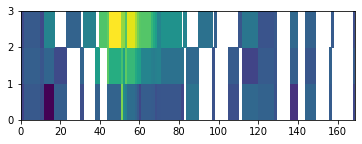

tf.Tensor([0.2622 0.0713], shape=(2,), dtype=float32) tf.Tensor(0, shape=(), dtype=int64)


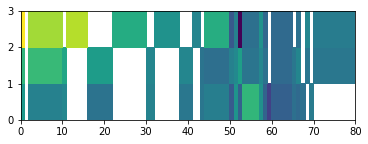

In [8]:
test_dataset('spcc', 'train', builder_kwargs={'default_target': 'sn1a'})

tfds.core.DatasetInfo(
    name='spcc',
    version=1.0.10,
    description='',
    homepage='https://www.tensorflow.org/datasets/catalog/spcc',
    features=FeaturesDict({
        'metadata': FeaturesDict({
            'object_id': tf.uint32,
            'redshift': tf.float32,
        }),
        'static': Tensor(shape=(2,), dtype=tf.float32),
        'static_errors': Tensor(shape=(2,), dtype=tf.float32),
        'targets': FeaturesDict({
            'class': ClassLabel(shape=(), dtype=tf.int64, num_classes=8),
            'sn1a': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        }),
        'time': Tensor(shape=(None,), dtype=tf.float32),
        'value_errors': Tensor(shape=(None, 4), dtype=tf.float32),
        'values': Tensor(shape=(None, 4), dtype=tf.float32),
    }),
    total_num_examples=21319,
    splits={
        'test': 20216,
        'train': 1103,
    },
    supervised_keys=('combined', 'target'),
    citation="""@article{kessler2010results,
      title={Resul

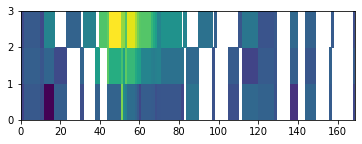

tf.Tensor([0.2622 0.0713], shape=(2,), dtype=float32) tf.Tensor(7, shape=(), dtype=int64)


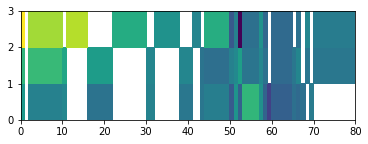

In [9]:
test_dataset('spcc', 'train')

Shuffling and writing examples to /Users/adammoss/tensorflow_datasets/plasticc/1.0.10.incomplete9FSFBS/plasticc-train.tfrecord


Shuffling and writing examples to /Users/adammoss/tensorflow_datasets/plasticc/1.0.10.incomplete9FSFBS/plasticc-test.tfrecord


ERROR:absl:Statistics generation doesn't work for nested structures yet
ERROR:absl:Statistics generation doesn't work for nested structures yet


ERROR:absl:Statistics generation doesn't work for nested structures yet
ERROR:absl:Statistics generation doesn't work for nested structures yet



Dataset plasticc downloaded and prepared to /Users/adammoss/tensorflow_datasets/plasticc/1.0.10. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='plasticc',
    version=1.0.10,
    description='',
    homepage='https://zenodo.org/record/2539456#.XzsWWxNKibs',
    features=FeaturesDict({
        'metadata': FeaturesDict({
            'object_id': tf.uint32,
            'redshift': tf.float32,
        }),
        'static': Tensor(shape=(3,), dtype=tf.float32),
        'static_errors': Tensor(shape=(3,), dtype=tf.float32),
        'targets': FeaturesDict({
            'class': ClassLabel(shape=(), dtype=tf.int64, num_classes=15),
            'sn1a': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        }),
        'time': Tensor(shape=(None,), dtype=tf.float32),
        'value_errors': Tensor(shape=(None, 6), dtype=tf.float32),
        'values': Tensor(shape=(None, 6), dtype=tf.float32),
    }),
    total_num_examples=40774,
    splits={
        'test': 3292

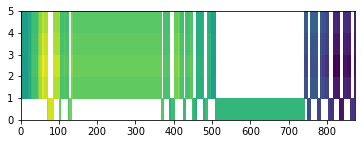

tf.Tensor([0.    0.027 0.   ], shape=(3,), dtype=float32) tf.Tensor(8, shape=(), dtype=int64)


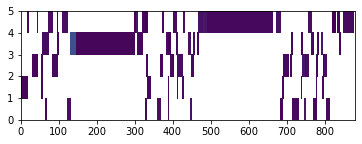

In [10]:
test_dataset('plasticc', 'train')